# Project Mythicwind

Re-Investigation into the tower oscillations observed during the installation of the offshore wind farm Trianel Windpark Borkum II

In [1]:
import pandas as pd
from scipy.signal import find_peaks

import matplotlib.pyplot as plt
%matplotlib notebook
data = pd.read_pickle('../data/BW77_filtered_fused.pickle')

## Overview


Preliminary Analysis based on the measurements of BW77 Installed between 01.09.2019 and 08.09.2019

Two interesting events are investigated in detail:

- 2019-09-04 09:00 -> 2019-09-04 17:00
- 2019-09-05 05:00 -> 2019-09-05 15:00



<IPython.core.display.Javascript object>


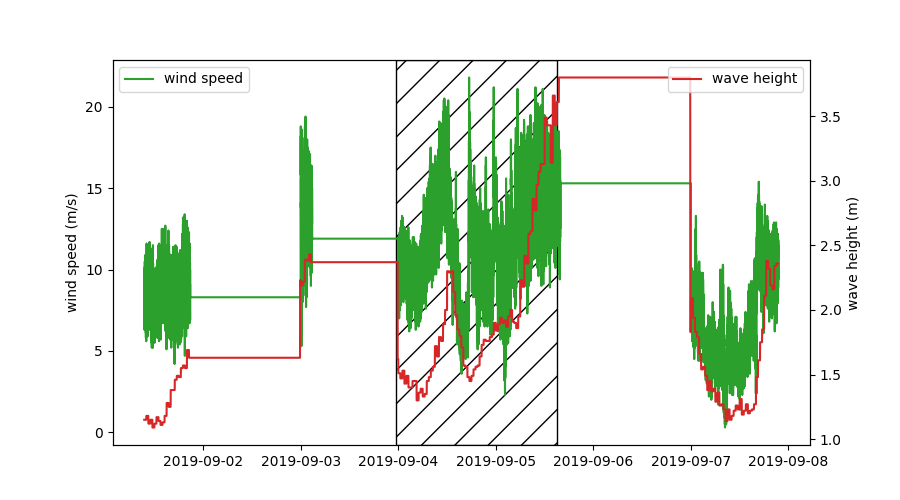

In [2]:
event1_start = pd.to_datetime('2019-09-04 01:30').tz_localize('Europe/Berlin')
event1_end = pd.to_datetime('2019-09-04 19:00').tz_localize('Europe/Berlin')
event2_start = pd.to_datetime('2019-09-05 07:00').tz_localize('Europe/Berlin')
event2_end = pd.to_datetime('2019-09-05 17:00').tz_localize('Europe/Berlin')

plt.figure(figsize=(9,5))
plt.plot(data.wind_speed, label='wind speed', color='tab:green')
plt.axvspan(event1_start, event2_end, facecolor="white", edgecolor='k', hatch='/')
# plt.axvspan(event2_start, event2_end, facecolor="white", edgecolor='k', hatch='/')
plt.legend(loc='upper left')
plt.ylabel('wind speed (m/s)')
ax2 = plt.gca().twinx()
ax2.plot(data.Hs, label='wave height', color='tab:red')
plt.ylabel('wave height (m)')
plt.legend(loc='upper right')



<IPython.core.display.Javascript object>


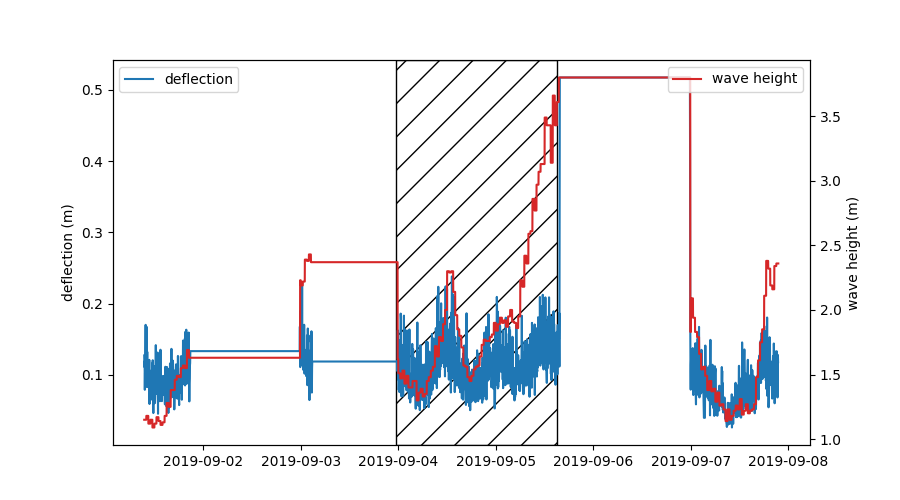

In [5]:
plt.figure(figsize=(9, 5))
plt.plot(data.deflection.resample('3min').mean(), label='deflection', )
plt.axvspan(event1_start, event2_end, facecolor="white", edgecolor='k', hatch='/')
#plt.axvspan(event2_start, event2_end, facecolor="white", edgecolor='k', hatch='/')
#plt.xlim([event1_start, event2_end])
plt.legend(loc='upper left')
plt.ylabel('deflection (m)')
ax2 = plt.gca().twinx()
ax2.plot(data.Hs, label='wave height', color='tab:red')
plt.ylabel('wave height (m)')
plt.legend(loc='upper right')


<IPython.core.display.Javascript object>


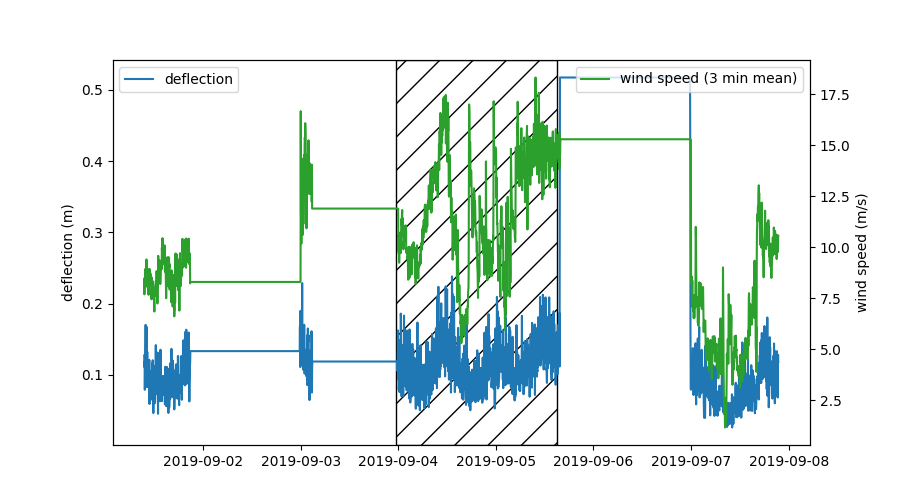

In [6]:
plt.figure(figsize=(9, 5))
plt.plot(data.deflection.resample('3min').mean(), label='deflection', )
plt.axvspan(event1_start, event2_end, facecolor="white", edgecolor='k', hatch='/')
#plt.axvspan(event2_start, event2_end, facecolor="white", edgecolor='k', hatch='/')
# plt.xlim([event1_start, event2_end])
plt.legend(loc='upper left')
plt.ylabel('deflection (m)')
ax2 = plt.gca().twinx()
ax2.plot(data.wind_speed.resample('3min').mean(), label='wind speed (3 min mean)', color='tab:green')
plt.ylabel('wind speed (m/s)')
plt.legend(loc='upper right')


###  Amplitude Envelope Function - Acceleration X & Z

<IPython.core.display.Javascript object>


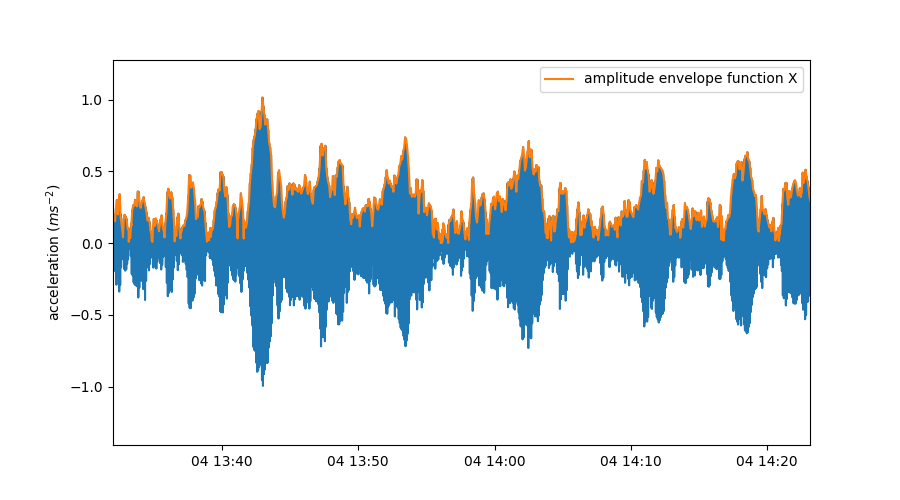

<IPython.core.display.Javascript object>


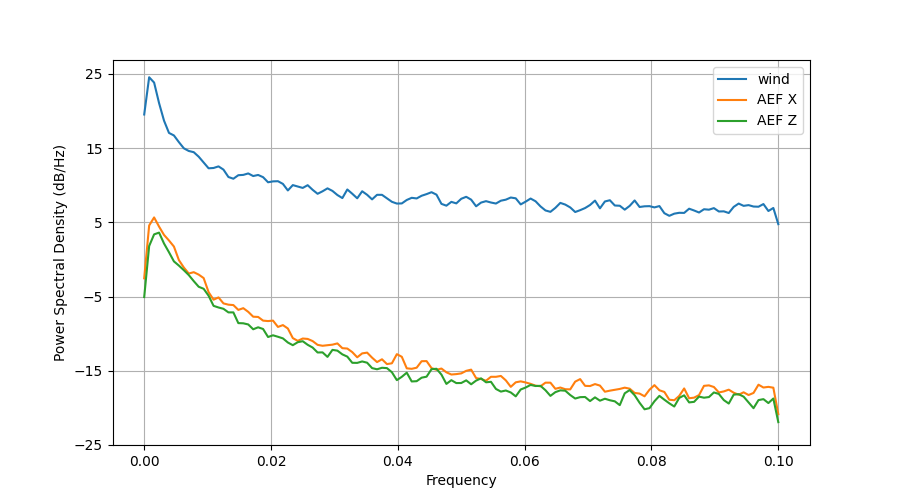

In [3]:
peaks_x, _ = find_peaks(data[event1_start:event2_end].acc_x, height=0)
peaks_z, _ = find_peaks(data[event1_start:event2_end].acc_z, height=0)

plt.figure(figsize=(9,5))

aef_x = data[event1_start:event2_end].acc_x.iloc[peaks_x]
aef_x = aef_x.resample('5s').bfill()
#aef_x -= aef_x.mean()

aef_z = data[event1_start:event2_end].acc_z.iloc[peaks_z]
aef_z = aef_z.resample('5s').bfill()
#aef_z -= aef_z.mean()

wind = data[event1_start:event2_end].wind_speed.resample('5s').bfill()

plt.plot(data[event1_start:event2_end].acc_x)
plt.plot(data[event1_start:event2_end].acc_x.iloc[peaks_x], label='amplitude envelope function X')
#plt.plot(aef_z, label='amplitude envelope function Z')

plt.ylabel('acceleration ($m s^{-2}$)')
plt.legend()

# plt.plot(aef_z)

plt.figure(figsize=(9,5))

plt.psd(wind, Fs=0.2, detrend='linear', label='wind')
plt.psd(aef_x, Fs=0.2, detrend='linear', label='AEF X')
plt.psd(aef_z, Fs=0.2, detrend='linear', label='AEF Z')
plt.legend()

### Amplitude Envelope Function - Position Vector

<IPython.core.display.Javascript object>


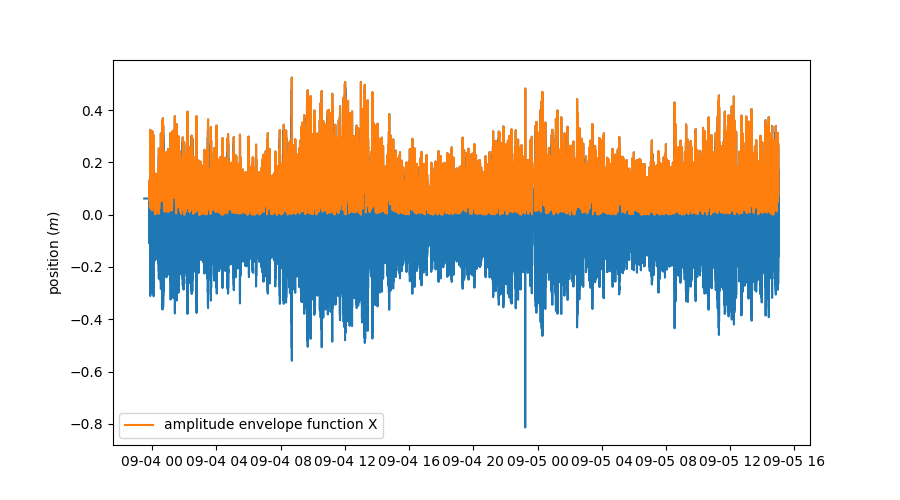

<IPython.core.display.Javascript object>


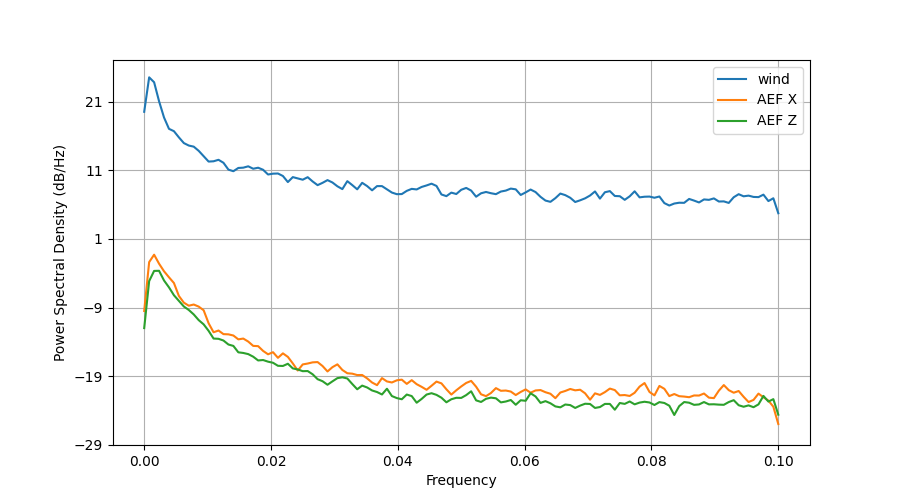

In [8]:
peaks_x, _ = find_peaks(data[event1_start:event2_end].pos_x, height=0)
peaks_z, _ = find_peaks(data[event1_start:event2_end].pos_z, height=0)

plt.figure(figsize=(9,5))

aef_x = data[event1_start:event2_end].pos_x.iloc[peaks_x]
aef_x = aef_x.resample('5s').bfill()
#aef_x -= aef_x.mean()

aef_z = data[event1_start:event2_end].pos_z.iloc[peaks_z]
aef_z = aef_z.resample('5s').bfill()
#aef_z -= aef_z.mean()

wind = data[event1_start:event2_end].wind_speed.resample('5s').bfill()

plt.plot(data[event1_start:event2_end].pos_x)
plt.plot(data[event1_start:event2_end].pos_x.iloc[peaks_x], label='amplitude envelope function X')
#plt.plot(aef_z, label='amplitude envelope function Z')

plt.ylabel('position ($m$)')
plt.legend()

# plt.plot(aef_z)

plt.figure(figsize=(9,5))

plt.psd(wind, Fs=0.2, detrend='linear', label='wind')
plt.psd(aef_x, Fs=0.2, detrend='linear', label='AEF X')
plt.psd(aef_z, Fs=0.2, detrend='linear', label='AEF Z')
plt.legend()